## 1. Import packages

In [7]:
import pickle
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

## 2. Load data

In [17]:
markers_dict_pkl=pickle.load(open('/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/030results_cistopic/040dars/markers_dict_pycisTopic_leiden_10_0.5.pkl', 'rb'))

## TEMP

In [2]:
import anndata
gene_matrix=anndata.read_h5ad('/lustre1/project/stg_00079/students/tingting/data/sun/snap2_PFC_synapse/01/gene_matrix_clusters_7_8.h5ad')
gene_matrix = gene_matrix[gene_matrix.obs['leiden_mnc_0.3'].isin(['7'])].copy()

: 

In [ ]:
immune_markers=['AIF1', 'ITGAM', 'P2RY12', 'TYROBP', 'CD163', 'CD68', 'MARCO', 'MRC1', 'MSR1', 'FCGR3A', 'KIR2DL4', 'PIM2', 'CD3E', 'CD4', 'CD8A', 'FOXP3', 'IL17A']

sc.pl.heatmap(
    gene_matrix,
    immune_markers,
    # groupby="leiden_mnc_0.3",
    groupby='overlap_nuclei',
    layer="scaled",
    vmin=-2,
    vmax=2,
    cmap="RdBu_r",
    dendrogram=True,
    swap_axes=True,
    figsize=(11, 4),
    show_gene_labels=True,
    show=True,
    # save='7_group_by_overlap_immnue.png'
)

## 3. marker regions

In [18]:
markers_dict_pkl

{'0':                             Log2FC  Adjusted_pval Contrast
 chr17:6711652-6712152     0.928064            0.0        0
 chr16:27428371-27428871   0.795657            0.0        0
 chr19:51113065-51113565   0.747530            0.0        0
 chr20:57464820-57465320   0.714707            0.0        0
 chr1:158354187-158354687  0.713424            0.0        0
 ...                            ...            ...      ...
 chr9:85729887-85730387    0.587831            0.0        0
 chr22:36447605-36448105   0.587143            0.0        0
 chr16:29618447-29618947   0.586670            0.0        0
 chr1:17023144-17023644    0.585529            0.0        0
 chr19:41808896-41809396   0.585369            0.0        0
 
 [94 rows x 3 columns],
 '1':                             Log2FC  Adjusted_pval Contrast
 chrY:7274374-7274874      0.736331            0.0        1
 chr10:7468850-7469350     0.704727            0.0        1
 chrY:7273582-7274082      0.682826            0.0        1
 chr

In [19]:
markers_dict_pkl.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8'])

In [20]:
markers_dict_pkl['0']

,Log2FC,Adjusted_pval,Contrast
chr17:6711652-6712152,0.928064,0.0,0
chr16:27428371-27428871,0.795657,0.0,0
chr19:51113065-51113565,0.747530,0.0,0
chr20:57464820-57465320,0.714707,0.0,0
chr1:158354187-158354687,0.713424,0.0,0
...,...,...,...
chr9:85729887-85730387,0.587831,0.0,0
chr22:36447605-36448105,0.587143,0.0,0
chr16:29618447-29618947,0.586670,0.0,0
chr1:17023144-17023644,0.585529,0.0,0


### 3.1 concatenate dataframes

In [21]:
concat_df=pd.concat([markers_dict_pkl[i] for i in markers_dict_pkl.keys()])

In [22]:
concat_df.shape

(23926, 3)

### 3.2 plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


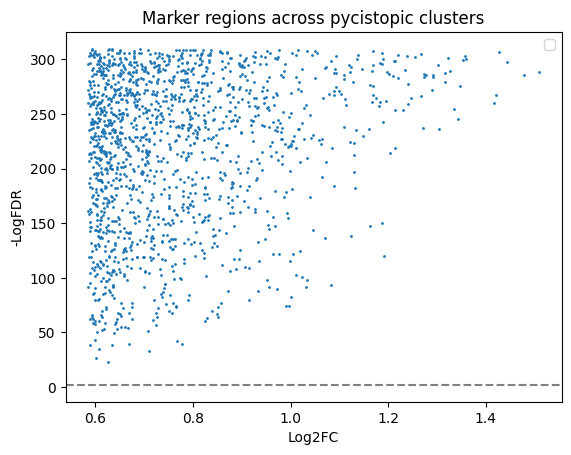

In [23]:
plt.scatter(x=concat_df['Log2FC'],y=concat_df['Adjusted_pval'].apply(lambda x:-np.log10(x)),s=1)

plt.xlabel("Log2FC")
plt.ylabel("-LogFDR")
# plt.axvline(-2,color="grey",linestyle="--")
# plt.axvline(2,color="grey",linestyle="--")
plt.axhline(2,color="grey",linestyle="--")
plt.title('Marker regions across pycistopic clusters')
plt.legend()

## 4. marker regions snap

In [24]:
markers_dict_pkl=pickle.load(open('/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/030results_cistopic/040dars/markers_dict_leiden_mnc_0.8.pkl', 'rb'))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


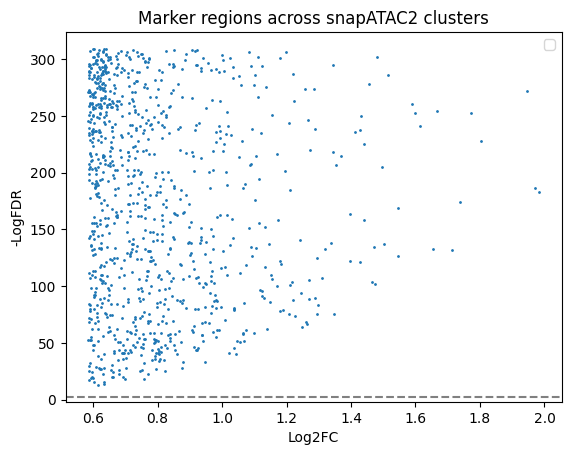

In [25]:
concat_df=pd.concat([markers_dict_pkl[i] for i in markers_dict_pkl.keys()])
plt.scatter(x=concat_df['Log2FC'],y=concat_df['Adjusted_pval'].apply(lambda x:-np.log10(x)),s=1)

plt.xlabel("Log2FC")
plt.ylabel("-LogFDR")
# plt.axvline(-2,color="grey",linestyle="--")
# plt.axvline(2,color="grey",linestyle="--")
plt.axhline(2,color="grey",linestyle="--")
plt.title('Marker regions across snapATAC2 clusters')
plt.legend()

In [26]:
concat_df.shape

(15372, 3)

## 5. marker genes

In [27]:
# pycistopic cluster
dag=pickle.load(open('/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/030results_cistopic/040dars/DAG_markers_dict_pycisTopic_leiden_10_0.5.pkl', 'rb'))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


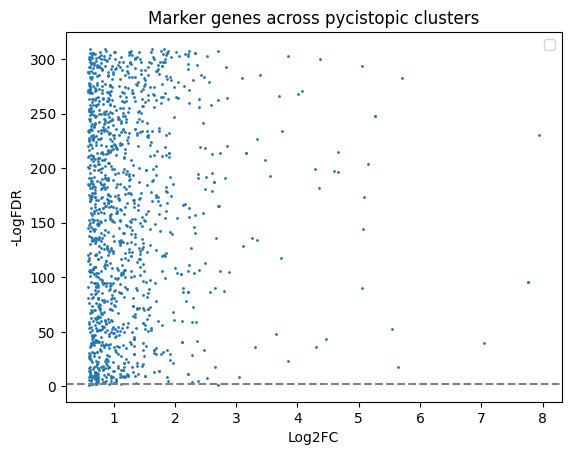

In [28]:
concat_df=pd.concat([dag[i] for i in dag.keys()])
plt.scatter(x=concat_df['Log2FC'],y=concat_df['Adjusted_pval'].apply(lambda x:-np.log10(x)),s=1)

plt.xlabel("Log2FC")
plt.ylabel("-LogFDR")
# plt.axvline(-2,color="grey",linestyle="--")
# plt.axvline(2,color="grey",linestyle="--")
plt.axhline(2,color="grey",linestyle="--")
plt.title('Marker genes across pycistopic clusters')
plt.legend()

In [29]:
concat_df.shape

(8642, 3)

In [30]:
## snapATAC2 clusters
dag=pickle.load(open('/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/030results_cistopic/040dars/DAG_markers_dict_leiden_mnc_0.8.pkl', 'rb'))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


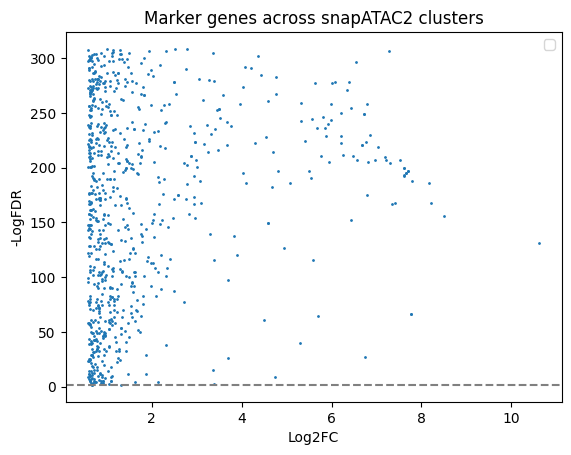

In [31]:
concat_df=pd.concat([dag[i] for i in dag.keys()])
plt.scatter(x=concat_df['Log2FC'],y=concat_df['Adjusted_pval'].apply(lambda x:-np.log10(x)),s=1)

plt.xlabel("Log2FC")
plt.ylabel("-LogFDR")
# plt.axvline(-2,color="grey",linestyle="--")
# plt.axvline(2,color="grey",linestyle="--")
plt.axhline(2,color="grey",linestyle="--")
plt.title('Marker genes across snapATAC2 clusters')
plt.legend()

In [32]:
concat_df.shape

(5444, 3)

## 5. counts 

In [34]:
marker_regions={'pycistopic': 23926, 'snapATAC2': 15372 }
marker_genes={'pycistopic': 8642, 'snapATAC2': 5444}

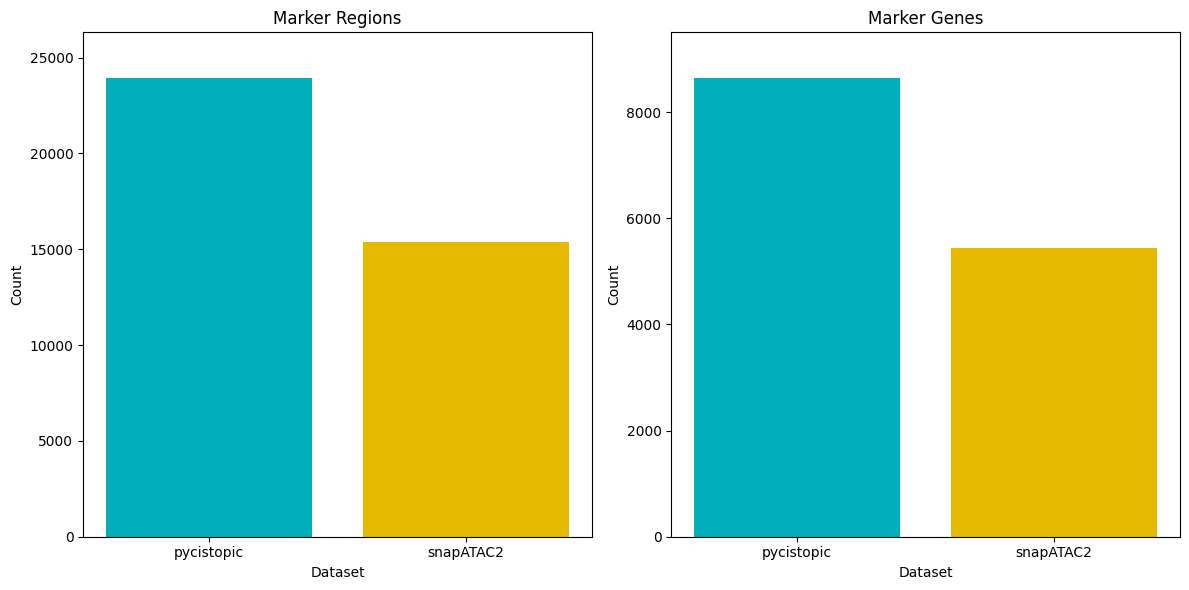

In [17]:
import matplotlib.pyplot as plt

# Data for marker regions and marker genes
marker_regions = {'pycistopic': 23926, 'snapATAC2': 15372}
marker_genes = {'pycistopic': 8642, 'snapATAC2': 5444}

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Define colors for consistency
colors = ['#00AFBB', '#E7B800']

# Plot marker regions
axs[0].bar(marker_regions.keys(), marker_regions.values(), color=colors)
axs[0].set_title('Marker Regions')
axs[0].set_ylabel('Count')
axs[0].set_xlabel('Dataset')
axs[0].set_ylim(0, max(marker_regions.values()) * 1.1)  # Add some space above the bars

# Plot marker genes
axs[1].bar(marker_genes.keys(), marker_genes.values(), color=colors)
axs[1].set_title('Marker Genes')
axs[1].set_ylabel('Count')
axs[1].set_xlabel('Dataset')
axs[1].set_ylim(0, max(marker_genes.values()) * 1.1)  # Add some space above the bars

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


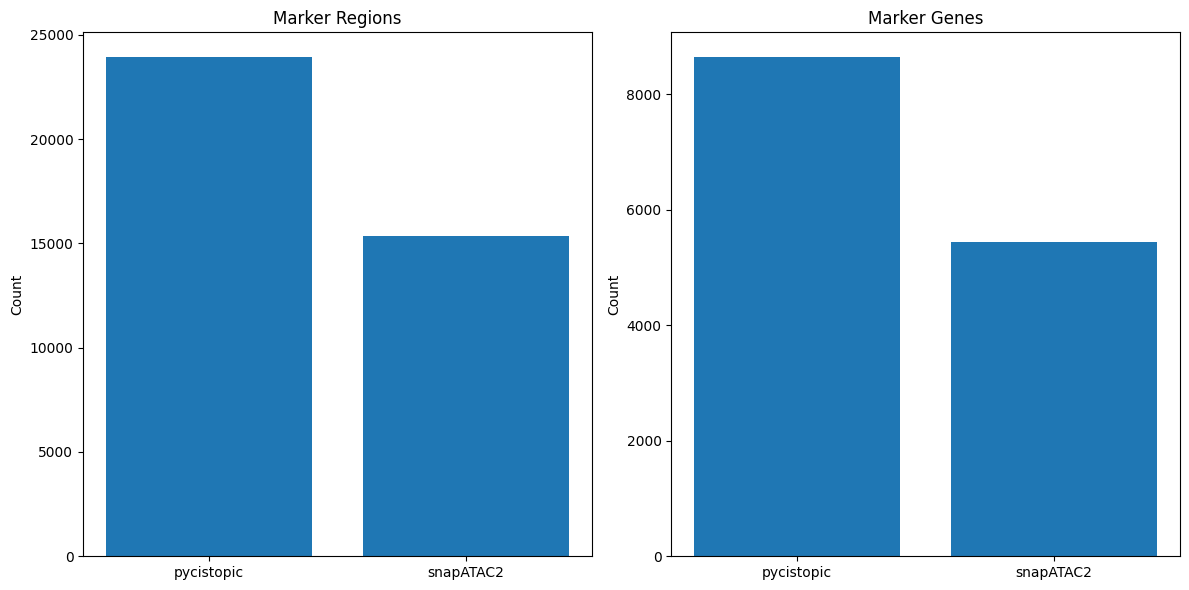

In [36]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot marker regions
axs[0].bar(marker_regions.keys(), marker_regions.values())
axs[0].set_title('Marker Regions')
axs[0].set_ylabel('Count')

# Plot marker genes
axs[1].bar(marker_genes.keys(), marker_genes.values())
axs[1].set_title('Marker Genes')
axs[1].set_ylabel('Count')

# Display the plots
plt.tight_layout()
plt.show()

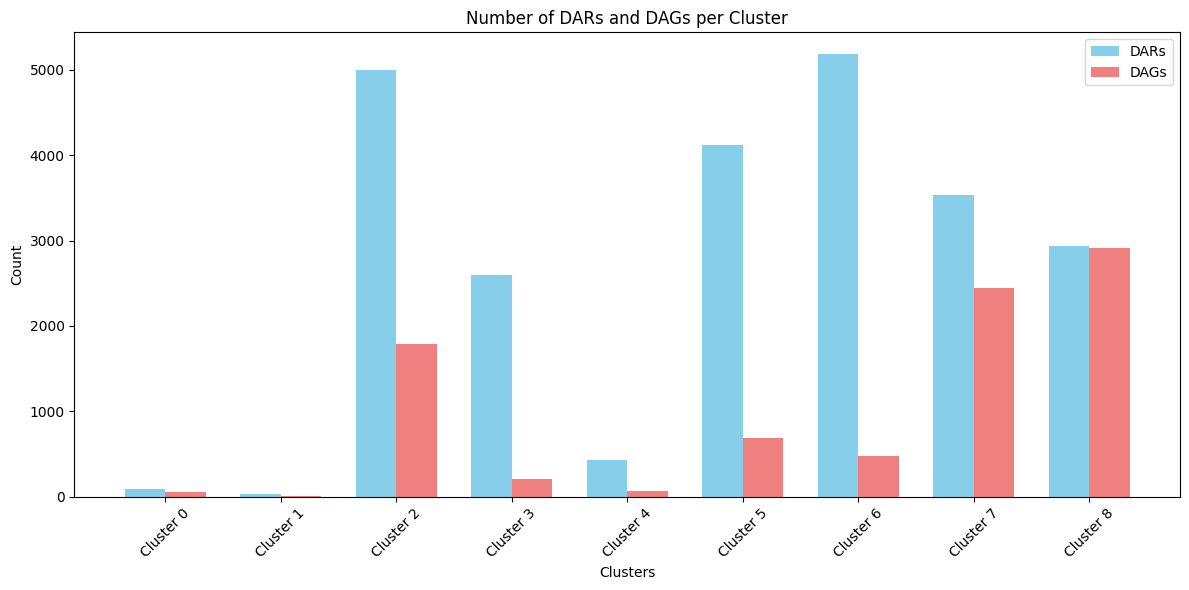

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data for clusters
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8']
DARs = [94, 25, 5004, 2601, 424, 4125, 5181, 3537, 2935]
DAGs = [54, 10, 1792, 206, 62, 682, 479, 2446, 2911]

# Number of clusters
n_clusters = len(clusters)

# Create a numpy array for the positions on the x-axis
x = np.arange(n_clusters)

# Width of the bars
width = 0.35

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the marker regions
bar1 = ax.bar(x - width/2, marker_regions, width, label='DARs', color='skyblue')

# Plotting the DAGs
bar2 = ax.bar(x + width/2, dags, width, label='DAGs', color='lightcoral')

# Add title and labels
ax.set_title('Number of DARs and DAGs per Cluster')
ax.set_xlabel('Clusters')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(clusters)
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


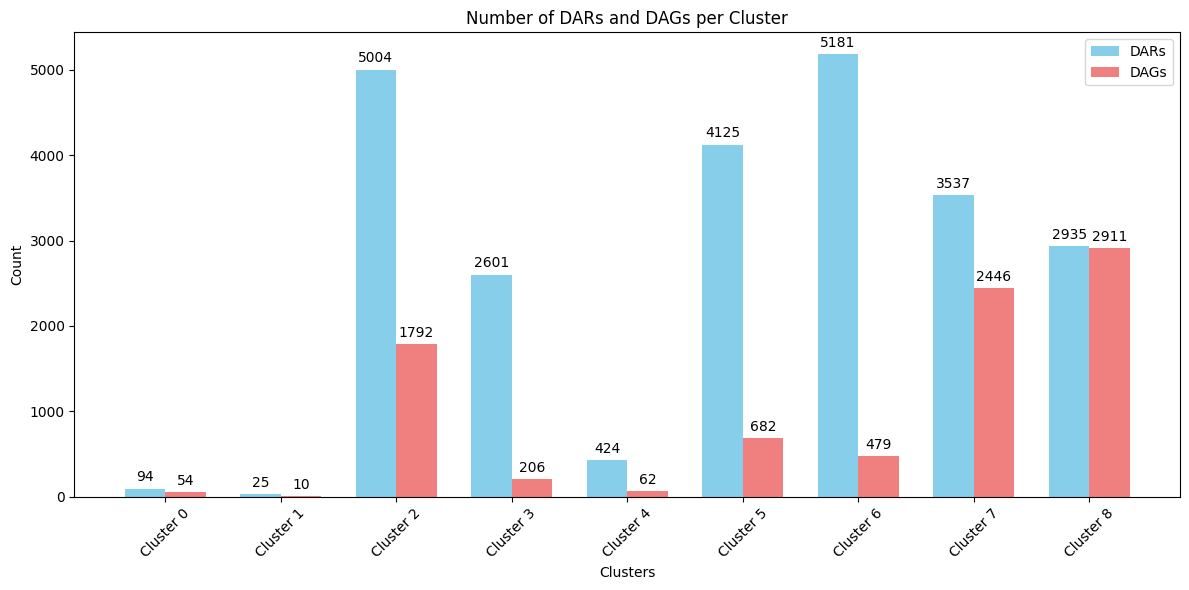

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data for clusters
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8']
marker_regions = [94, 25, 5004, 2601, 424, 4125, 5181, 3537, 2935]
dags = [54, 10, 1792, 206, 62, 682, 479, 2446, 2911]

# Number of clusters
n_clusters = len(clusters)

# Create a numpy array for the positions on the x-axis
x = np.arange(n_clusters)

# Width of the bars
width = 0.35

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the marker regions
bar1 = ax.bar(x - width/2, marker_regions, width, label='DARs', color='skyblue')

# Plotting the DAGs
bar2 = ax.bar(x + width/2, dags, width, label='DAGs', color='lightcoral')

# Add title and labels
ax.set_title('Number of DARs and DAGs per Cluster')
ax.set_xlabel('Clusters')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(clusters)
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add numbers on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

# Display the plot
plt.tight_layout()
plt.show()


## snapatac2 cluster

In [12]:
markers_dict_pkl_snap=pickle.load(open('/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/030results_cistopic/040dars/markers_dict_leiden_mnc_0.8.pkl', 'rb'))

In [13]:
for i in markers_dict_pkl_snap.keys():
    print(f"number of DARs in cluste {i}: {markers_dict_pkl_snap[i].shape[0]}")

number of DARs in cluste 0: 0
number of DARs in cluste 1: 84
number of DARs in cluste 2: 4059
number of DARs in cluste 3: 80
number of DARs in cluste 4: 2827
number of DARs in cluste 5: 3498
number of DARs in cluste 6: 4824


In [14]:
markers_dict_pkl_snap=pickle.load(open('/lustre1/project/stg_00079/students/tingting/data/sun/snap2_allfragments/08/030results_cistopic/040dars/DAG_markers_dict_leiden_mnc_0.8.pkl', 'rb'))

In [15]:
for i in markers_dict_pkl_snap.keys():
    print(f"number of DAGs in cluster {i}: {markers_dict_pkl_snap[i].shape[0]}")

number of DAGs in cluster 0: 1
number of DAGs in cluster 1: 14
number of DAGs in cluster 2: 1550
number of DAGs in cluster 3: 78
number of DAGs in cluster 4: 219
number of DAGs in cluster 5: 2795
number of DAGs in cluster 6: 787


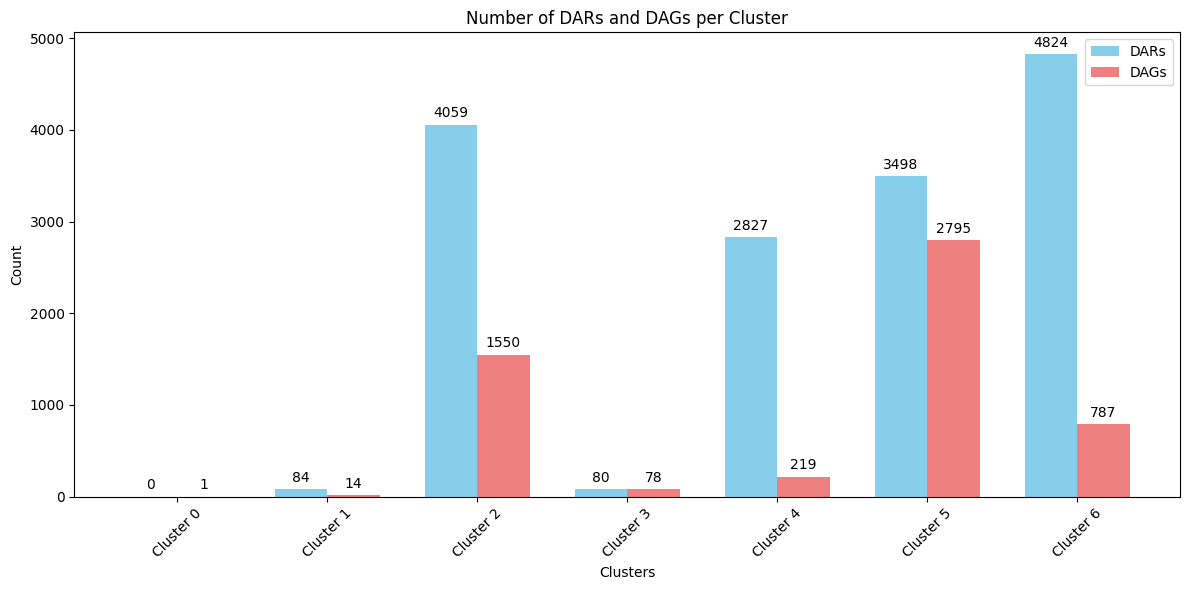

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Data for clusters
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6']
DARs = [0, 84, 4059, 80, 2827, 3498, 4824]
DAGs = [1, 14, 1550, 78, 219, 2795, 787]
num_nuclei=[11106, 10313, 9807, 7389, 2990, 2418, 1433] # marker.ipynb

# Number of clusters
n_clusters = len(clusters)

# Create a numpy array for the positions on the x-axis
x = np.arange(n_clusters)

# Width of the bars
width = 0.35

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the marker regions
bar1 = ax.bar(x - width/2, DARs, width, label='DARs', color='skyblue')

# Plotting the DAGs
bar2 = ax.bar(x + width/2, DAGs, width, label='DAGs', color='lightcoral')

# Add title and labels
ax.set_title('Number of DARs and DAGs per Cluster')
ax.set_xlabel('Clusters')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(clusters)
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add numbers on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

# Display the plot
plt.tight_layout()
plt.show()


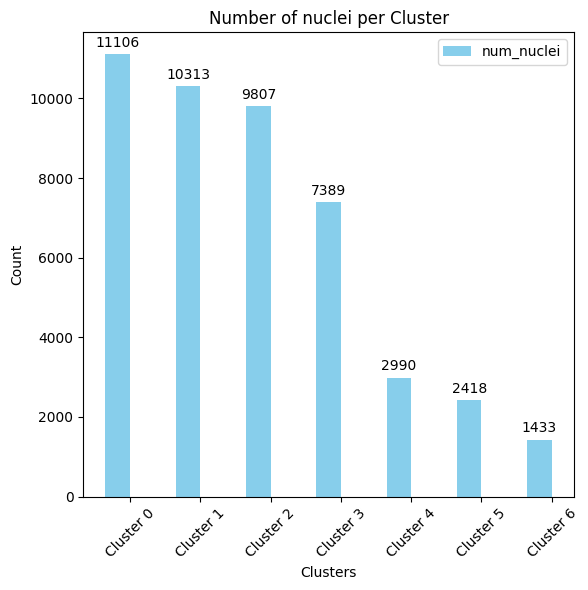

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Data for clusters
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6']
num_nuclei=[11106, 10313, 9807, 7389, 2990, 2418, 1433] # marker.ipynb

# Number of clusters
n_clusters = len(clusters)

# Create a numpy array for the positions on the x-axis
x = np.arange(n_clusters)

# Width of the bars
width = 0.35

# Create the plot
fig, ax = plt.subplots(figsize=(6, 6))

# Plotting the marker regions
bar1 = ax.bar(x - width/2, num_nuclei, width, label='num_nuclei', color='skyblue')


# Add title and labels
ax.set_title('Number of nuclei per Cluster')
ax.set_xlabel('Clusters')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(clusters)
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add numbers on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)

# Display the plot
plt.tight_layout()
plt.show()


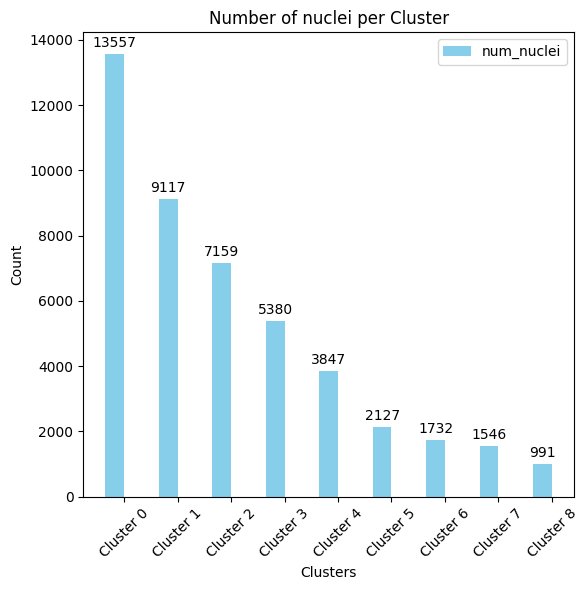

In [25]:
import matplotlib.pyplot as plt
import numpy as np


# Data for clusters
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8']
num_nuclei=[13557, 9117, 7159, 5380, 3847, 2127, 1732, 1546, 991] # marker.ipynb

# Number of clusters
n_clusters = len(clusters)

# Create a numpy array for the positions on the x-axis
x = np.arange(n_clusters)

# Width of the bars
width = 0.35

# Create the plot
fig, ax = plt.subplots(figsize=(6, 6))

# Plotting the marker regions
bar1 = ax.bar(x - width/2, num_nuclei, width, label='num_nuclei', color='skyblue')


# Add title and labels
ax.set_title('Number of nuclei per Cluster')
ax.set_xlabel('Clusters')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(clusters)
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add numbers on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)

# Display the plot
plt.tight_layout()
plt.show()


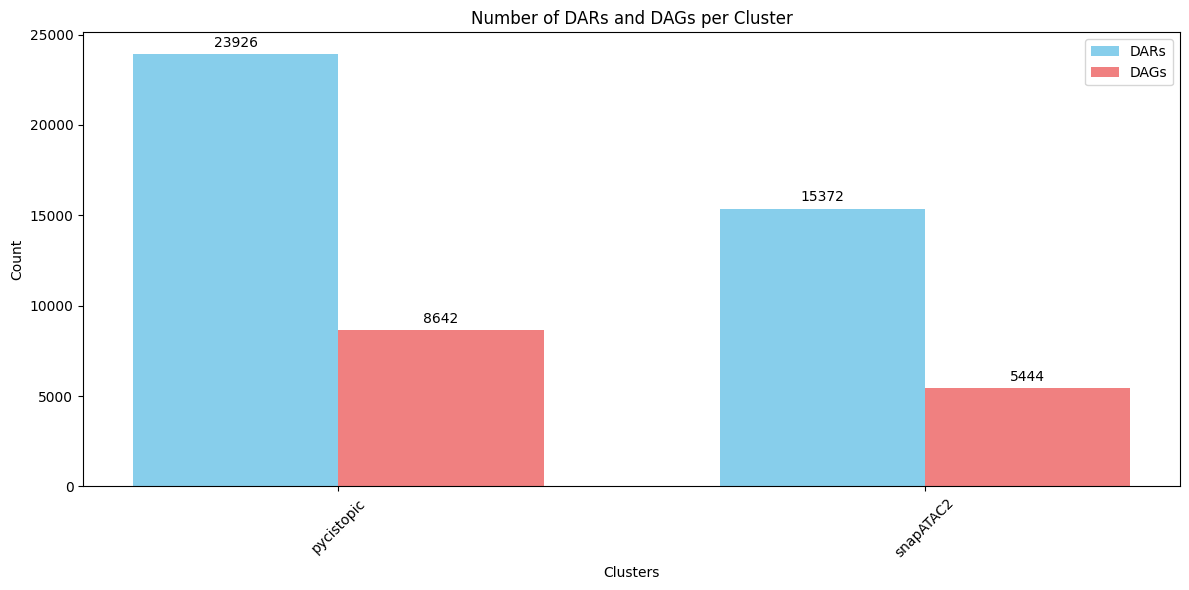

In [18]:
import matplotlib.pyplot as plt
import numpy as np

marker_regions = {'pycistopic': 23926, 'snapATAC2': 15372}
marker_genes = {'pycistopic': 8642, 'snapATAC2': 5444}

# Data for clusters
clusters = ['pycistopic', 'snapATAC2']
marker_regions = [23926, 15372]
dags = [8642, 5444]

# Number of clusters
n_clusters = len(clusters)

# Create a numpy array for the positions on the x-axis
x = np.arange(n_clusters)

# Width of the bars
width = 0.35

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the marker regions
bar1 = ax.bar(x - width/2, marker_regions, width, label='DARs', color='skyblue')

# Plotting the DAGs
bar2 = ax.bar(x + width/2, dags, width, label='DAGs', color='lightcoral')

# Add title and labels
ax.set_title('Number of DARs and DAGs per Cluster')
ax.set_xlabel('Clusters')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(clusters)
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add numbers on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

# Display the plot
plt.tight_layout()
plt.show()